In [5]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
sia = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    sentiment_scores = []
    for sentence in text:
        sentence_str = " ".join(sentence)  # Menggabungkan token-token menjadi kalimat
        sentiment_scores.append(sia.polarity_scores(sentence_str)["compound"])
    return sentiment_scores

In [16]:
filename = "/content/drive/MyDrive/Colab Notebooks/dataset/Scrapping_Ivanna.csv"
reviewdf = pd.read_csv(filename, encoding = 'latin-1')
print("Jumlah Baris = " + str(len(reviewdf["UserReview"])))
reviewdf.head(10)

Jumlah Baris = 18


,Rating,UserReview,cleaned_text,tokens,lemmatized_review
0,8,This is a Very Good Horror Movie better than D...,this is a very good horror movie better than d...,"['this', 'is', 'a', 'very', 'good', 'horror', ...","['good', 'horror', 'movie', 'better', 'danur',..."
1,7,BLOODY SLASHER! Good bloody slasher. Camerawor...,bloody slasher good bloody slasher camerawor...,"['bloody', 'slasher', 'good', 'bloody', 'slash...","['bloody', 'slasher', 'good', 'bloody', 'slash..."
2,4,Another awful entry in an all-around awful ser...,another awful entry in an all around awful ser...,"['another', 'awful', 'entry', 'in', 'an', 'all...","['another', 'awful', 'entry', 'around', 'awful..."
3,6,"Pretty okay, though somewhat repetitive The pl...",pretty okay though somewhat repetitive the pl...,"['pretty', 'okay', 'though', 'somewhat', 'repe...","['pretty', 'okay', 'though', 'somewhat', 'repe..."
4,4,It's just another ordinary horror movie. The s...,it s just another ordinary horror movie the s...,"['it', 's', 'just', 'another', 'ordinary', 'ho...","['another', 'ordinary', 'horror', 'movie', 'st..."
5,5,Yet another dull film from Danur franchise Kim...,yet another dull film from danur franchise kim...,"['yet', 'another', 'dull', 'film', 'from', 'da...","['yet', 'another', 'dull', 'film', 'danur', 'f..."
6,4,Dont belive the ratings! This doesn't make any...,dont belive the ratings this doesn t make any...,"['dont', 'belive', 'the', 'ratings', 'this', '...","['dont', 'belive', 'rating', 'make', 'sense', ..."
7,9,one of the best Indonesian horror films of 202...,one of the best indonesian horror films of ...,"['one', 'of', 'the', 'best', 'indonesian', 'ho...","['one', 'best', 'indonesian', 'horror', 'film'..."
8,8,Pretty good movie I'm surprised by the bad rev...,pretty good movie i m surprised by the bad rev...,"['pretty', 'good', 'movie', 'i', 'm', 'surpris...","['pretty', 'good', 'movie', 'surprised', 'bad'..."
9,5,"Watchable, but sort of generic... When I sat d...",watchable but sort of generic when i sat d...,"['watchable', 'but', 'sort', 'of', 'generic', ...","['watchable', 'sort', 'generic', 'sat', 'watch..."


In [26]:
analyzer = SentimentIntensityAnalyzer()
reviewdf['Sentiment'] = ''
reviewdf['Compound'] = 0.0

In [27]:
for index, row in reviewdf.iterrows():
    text = row['cleaned_text']
    sentiment_score = analyzer.polarity_scores(text)
    
    if sentiment_score['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    reviewdf.at[index, 'Sentiment'] = sentiment
    reviewdf.at[index, 'Compound'] = sentiment_score['compound']

In [28]:
reviewdf.head()

,Rating,UserReview,cleaned_text,tokens,lemmatized_review,Sentiment,Compound
0,8,This is a Very Good Horror Movie better than D...,this is a very good horror movie better than d...,"['this', 'is', 'a', 'very', 'good', 'horror', ...","['good', 'horror', 'movie', 'better', 'danur',...",Positive,0.9925
1,7,BLOODY SLASHER! Good bloody slasher. Camerawor...,bloody slasher good bloody slasher camerawor...,"['bloody', 'slasher', 'good', 'bloody', 'slash...","['bloody', 'slasher', 'good', 'bloody', 'slash...",Negative,-0.7579
2,4,Another awful entry in an all-around awful ser...,another awful entry in an all around awful ser...,"['another', 'awful', 'entry', 'in', 'an', 'all...","['another', 'awful', 'entry', 'around', 'awful...",Negative,-0.9144
3,6,"Pretty okay, though somewhat repetitive The pl...",pretty okay though somewhat repetitive the pl...,"['pretty', 'okay', 'though', 'somewhat', 'repe...","['pretty', 'okay', 'though', 'somewhat', 'repe...",Negative,-0.2272
4,4,It's just another ordinary horror movie. The s...,it s just another ordinary horror movie the s...,"['it', 's', 'just', 'another', 'ordinary', 'ho...","['another', 'ordinary', 'horror', 'movie', 'st...",Negative,-0.2679


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

from wordcloud import WordCloud

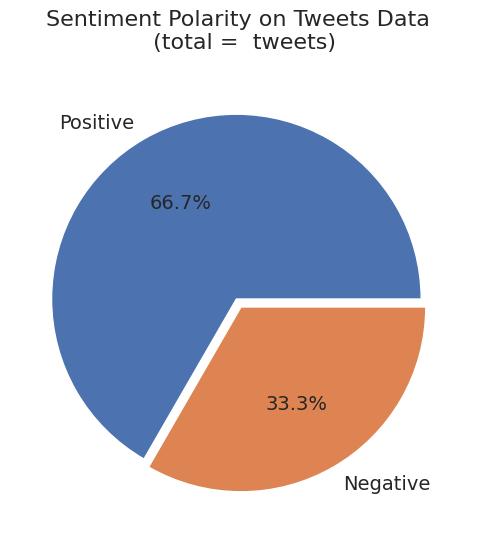

In [39]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in reviewdf['Sentiment'].value_counts()]
labels = list(reviewdf['Sentiment'].value_counts().index)
explode = (0.05, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total =  tweets)', fontsize = 16, pad = 20)
plt.show()

In [45]:
df_negative = reviewdf[ (reviewdf['Sentiment']=='Negative') ]
df_positive = reviewdf[ (reviewdf['Sentiment']=='Positive') ]
#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()
     

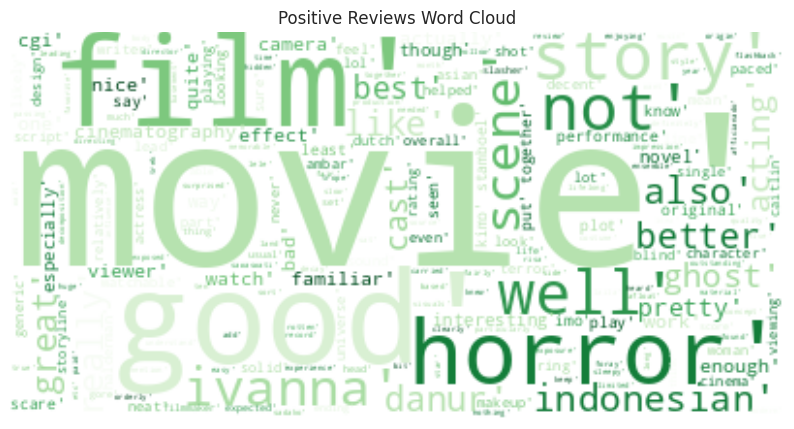

In [46]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

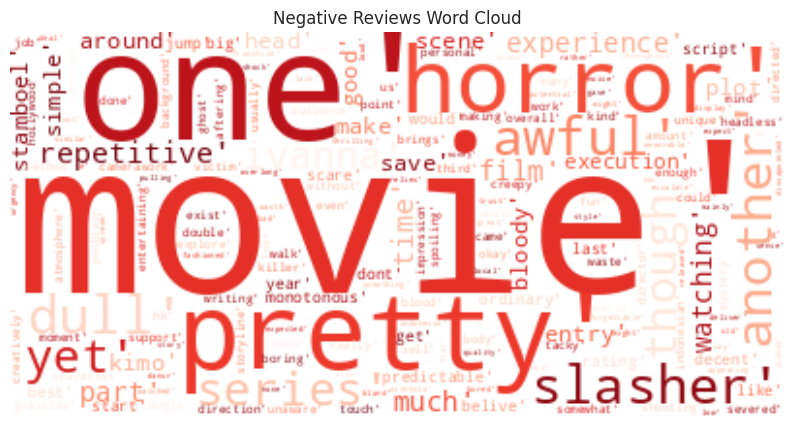

In [47]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()